# Gray-scale

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


uint8


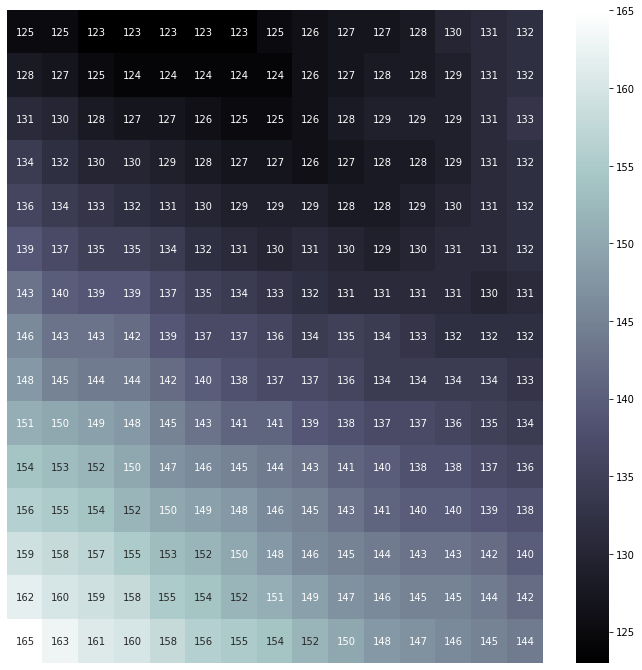

In [24]:
import cv2
from skimage import data
#from skimage.color import rgb2gray
from skimage import img_as_ubyte,img_as_float
import matplotlib.pyplot as plt
import seaborn as sns

cat = data.chelsea() # take the test image of cat!

cat_cv = cv2.cvtColor(cat,cv2.COLOR_RGB2BGR)
gray_cat = cv2.cvtColor(cat,cv2.COLOR_RGB2GRAY)

print(gray_cat.dtype)
plt.figure(figsize=(12,12))
sns.heatmap(gray_cat[:15, :15], annot=True, fmt="d", cmap=plt.cm.bone)
plt.axis("off")
plt.show()

# BGRA

default:(120, 98, 3)/imread_color:(120, 98, 3)/imread_unchanged:(120, 98, 4)


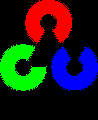

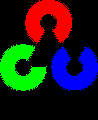

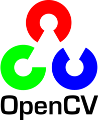

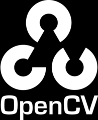

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        15, 117, 213, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 241, 165,  54,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0], dtype=uint8)

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow

fstr = './opencv_logo.png'

img = cv2.imread(fstr) # BGR
img_bgr = cv2.imread(fstr, cv2.IMREAD_COLOR) # BGR
img_bgra = cv2.imread(fstr, cv2.IMREAD_UNCHANGED) # BGR

print(f'default:{img.shape}/imread_color:{img_bgr.shape}/imread_unchanged:{img_bgra.shape}')

cv2_imshow(img)
cv2_imshow(img_bgr)
cv2_imshow(img_bgra)
cv2_imshow(img_bgra[:,:,3])

img_bgra[1,:,3]

# HSV

In [8]:
from matplotlib.colors import hsv_to_rgb

H, V = np.mgrid[0:1:360j, 0:1:100j]
S = np.ones_like(V)

print("Hue H's size :",H.shape)
print("Saturation S's size :",S.shape)
print("Intnesity V's size :",V.shape)

HSV_S100 = np.dstack((H, S * 1.0, V)) # depth 방향으로 배열을 합침. 가장 안쪽의 원소가 합쳐짐.
HSV_S20  = np.dstack((H, S * 0.2, V))

RGB_S100 = hsv_to_rgb(HSV_S100)
RGB_S20  = hsv_to_rgb(HSV_S20)

print("HSV_S20's shape:",HSV_S20.shape)

Hue H's size : (360, 100)
Saturation S's size : (360, 100)
Intnesity V's size : (360, 100)
HSV_S20's shape: (360, 100, 3)


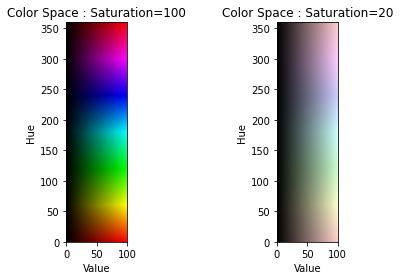

In [9]:

plt.subplot(121)
plt.imshow(RGB_S100,origin="higher",extent=[0,100,0,360])
plt.ylabel("Hue")
plt.xlabel("Value")
plt.title("Color Space : Saturation=100")
plt.grid(False)

plt.subplot(122)
plt.imshow(RGB_S20, origin="higher",extent=[0,100,0,360])
plt.ylabel("Hue")
plt.xlabel("Value")
plt.title("Color Space : Saturation=20")
plt.grid(False)

plt.tight_layout()
plt.show()

In [12]:
red_bgr = np.array([[[0,0,255]]], dtype=np.uint8)
green_bgr = np.array([[[0,255,0]]], dtype=np.uint8)
blue_bgr = np.array([[[255,0,0]]], dtype=np.uint8)
yellow_bgr = np.array([[[0,255,255]]], dtype=np.uint8)

red_hsv = cv2.cvtColor(red_bgr, cv2.COLOR_BGR2HSV)
green_hsv = cv2.cvtColor(green_bgr, cv2.COLOR_BGR2HSV)
blue_hsv = cv2.cvtColor(blue_bgr, cv2.COLOR_BGR2HSV)
yellow_hsv = cv2.cvtColor(yellow_bgr, cv2.COLOR_BGR2HSV)

print(f'red:   {red_hsv}')
print(f'green: {green_hsv}')
print(f'blue:  {blue_hsv}')
print(f'yellow:{yellow_hsv}')

red:   [[[  0 255 255]]]
green: [[[ 60 255 255]]]
blue:  [[[120 255 255]]]
yellow:[[[ 30 255 255]]]


# YCbCr

In [13]:
dark   = np.array([[[0,0,0]]], dtype=np.uint8)
middle = np.array([[[127,127,127]]], dtype=np.uint8)
bright = np.array([[[255,255,255]]], dtype=np.uint8)

dark_yuv = cv2.cvtColor(dark, cv2.COLOR_BGR2YUV)
middle_yuv = cv2.cvtColor(middle, cv2.COLOR_BGR2YUV)
bright_yuv = cv2.cvtColor(bright, cv2.COLOR_BGR2YUV)

print('dark:   {}'.format(dark_yuv))
print('middle: {}'.format(middle_yuv))
print('bright: {}'.format(bright_yuv))

dark:   [[[  0 128 128]]]
middle: [[[127 128 128]]]
bright: [[[255 128 128]]]


# OpenCV's Color-spaces

In [15]:
cs = [i for i in dir(cv2) if i.startswith('COLOR_')]
print(len(cs))

274


In [16]:
cs

['COLOR_BAYER_BG2BGR',
 'COLOR_BAYER_BG2BGRA',
 'COLOR_BAYER_BG2BGR_EA',
 'COLOR_BAYER_BG2BGR_VNG',
 'COLOR_BAYER_BG2GRAY',
 'COLOR_BAYER_BG2RGB',
 'COLOR_BAYER_BG2RGBA',
 'COLOR_BAYER_BG2RGB_EA',
 'COLOR_BAYER_BG2RGB_VNG',
 'COLOR_BAYER_GB2BGR',
 'COLOR_BAYER_GB2BGRA',
 'COLOR_BAYER_GB2BGR_EA',
 'COLOR_BAYER_GB2BGR_VNG',
 'COLOR_BAYER_GB2GRAY',
 'COLOR_BAYER_GB2RGB',
 'COLOR_BAYER_GB2RGBA',
 'COLOR_BAYER_GB2RGB_EA',
 'COLOR_BAYER_GB2RGB_VNG',
 'COLOR_BAYER_GR2BGR',
 'COLOR_BAYER_GR2BGRA',
 'COLOR_BAYER_GR2BGR_EA',
 'COLOR_BAYER_GR2BGR_VNG',
 'COLOR_BAYER_GR2GRAY',
 'COLOR_BAYER_GR2RGB',
 'COLOR_BAYER_GR2RGBA',
 'COLOR_BAYER_GR2RGB_EA',
 'COLOR_BAYER_GR2RGB_VNG',
 'COLOR_BAYER_RG2BGR',
 'COLOR_BAYER_RG2BGRA',
 'COLOR_BAYER_RG2BGR_EA',
 'COLOR_BAYER_RG2BGR_VNG',
 'COLOR_BAYER_RG2GRAY',
 'COLOR_BAYER_RG2RGB',
 'COLOR_BAYER_RG2RGBA',
 'COLOR_BAYER_RG2RGB_EA',
 'COLOR_BAYER_RG2RGB_VNG',
 'COLOR_BGR2BGR555',
 'COLOR_BGR2BGR565',
 'COLOR_BGR2BGRA',
 'COLOR_BGR2GRAY',
 'COLOR_BGR2HLS',
 'COLO